# Partial Sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

In [1]:
from ipynb.fs.full.project1 import *
import numpy as np
from ipynb.fs.full.partial_sensing import *

In [2]:
maze_size = 10
probability = 0.3
global agent_gridworld
global helper_matrix
global helper_matrix
global full_grid_world_matrix
global visited_list
global block_unblock_matrix
global path
global number_of_bumps

number_of_bumps = 0
agent_gridworld = np.matrix(np.zeros((maze_size, maze_size)))
confirmed_path = [] #path that agent 3 has recognized
helper_matrix = np.full((maze_size, maze_size), 0)
full_grid_world_matrix = np.full((maze_size, maze_size), 0)
visited_list = [] # list of node indices that are visited

# object_matrix is used to store the inference/ knowledge base of objects(nodes) with it's respective indices
knowledge_base = np.array([partial_sensing(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)


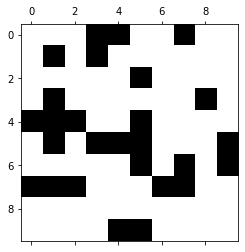

In [3]:
# block_unblock_matrix = populateMatrix(maze_size, probability)

block_unblock_matrix = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]
#######################################
# populateMatrix(n,p)
block_unblock_matrix = np.matrix(block_unblock_matrix)
plt.spy(block_unblock_matrix)

In [4]:
# dim=5
# p=0.3
# full_gridworld = []
# agent_gridworld = [] # known gridworld
# helper_matrix = []

In [5]:
def initialize_agent_gridworld():
    #blah
    return

In [6]:
def blockedNeighbors(n, row, col):
    
    global block_unblock_matrix
    direction_list = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    
    count = 0
#     if not full_grid_world_matrix == []:
    for direction in direction_list:
        row_new = row + direction[0]
        col_new = col + direction[1]
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            if block_unblock_matrix[row_new, col_new] == 1:
                count += 1
    return count

def initialize_helper_matrix(n):
    
    dir = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    global helper_matrix
    for x in range(n):
        for y in range(n):
            count = blockedNeighbors(n, x, y)
            helper_matrix[x][y] = count

helper_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
# def initialize_all_matrices(dim,p):
# #     global full_gridworld
# #     global helper_matrix
# #     global agent_gridworld
# #     global maze_size
# #     global block_unblock_matrix
    

#     initialize(dim,p)
#     full_gridworld = block_unblock_matrix
#     agent_gridworld = initialize_agent_gridworld()
#     helper_matrix = initialize_helper_matrix(maze_size)
# initialize_all_matrices(dim,p)

In [8]:
def get_agent_gridworld_from_knowledge_base(object_matrix):
    global maze_size

    agent_gridworld = np.zeros((maze_size, maze_size))
    for i in range(maze_size):
        for j in range(maze_size):
            if object_matrix.item((i,j)).blocked == 1:
                agent_gridworld[i][j] = 1
    return agent_gridworld

# call get_agent_gridworld_from_knowledge_base(object_matrix) -> returns a (maze_size*maze_size) np matrix with 0s, 1s
# Now we can call astar() on agent_gridworld like this: astar(start, agent_gridworld)

In [9]:
def getNx(row, col, n):
    if (row ==0  and col == 0) or (row == 0 and col == n-1) or (row==n-1 and col==0) or (row ==n-1 and col==n-1):
        return 3
    
    elif row == 0 or col == 0 or col == n-1 or row == n-1:
        return 5
    else:
        return 8

In [10]:
def get_neighbors(row, col, n):
    #top left node
    if (row ==0  and col == 0) :
        return [(row+1, col), (row, col+1), (row+1, col+1)]
    
    #top right node
    elif (row == 0 and col == n-1):
        return [(row, col-1), (row+1, col), (row+1, col-1)]
    
    #bottom left node
    elif (row==n-1 and col==0):
        return [(row-1, col), (row, col+1), (row-1, col+1)]
    
    #bottom right node
    elif (row ==n-1 and col==n-1):
        return [(row-1, col-1), (row, col-1), (row-1, col-1)]
    
    # top edge nodes
    elif row == 0:
        return [(row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1), (row, col+1)]
    
    # bottom edge nodes
    elif row == n-1:
        return [(row, col-1), (row-1, col-1), (row-1, col), (row-1, col+1), (row, col+1)]
    
    # left edge nodes
    elif col == 0:
        return [(row-1, col), (row-1, col+1), (row, col+1), (row+1, col+1), (row+1, col)]
    
    # right edge nodes
    elif col == n-1:
        return [(row-1, col), (row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col)]
    else:
        return [(row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1),\
               (row, col+1), (row-1, col+1), (row-1, col)]
    


In [11]:
def update_current_node_attributes(row, col, maze_size):
    knowledge_base[row][col].Nx = getNx(row, col, maze_size)
#     knowledge_base[row][col].display_node()
    knowledge_base[row][col].Cx = helper_matrix[row][col]
    print("Cx = ", knowledge_base[row][col].Cx)

    if knowledge_base[row][col].Hx != 0:
        if knowledge_base[row][col].Cx == knowledge_base[row][col].Bx:
            knowledge_base[row][col].Ex += knowledge_base[row][col].Hx
            knowledge_base[row][col].Hx = 0
            #ToDo: set all unknown neighbour to Empty

        if knowledge_base[row][col].Nx - knowledge_base[row][col].Cx == knowledge_base[row][col].Ex:
            knowledge_base[row][col].Bx += knowledge_base[row][col].Hx
            knowledge_base[row][col].Hx = 0
        
        

    ##ToDo:
    #knowledge_base[node].Hx = 
    #knowledge_base[node].Bx = 0
    #knowledge_base[node].Ex = 0

In [12]:
def update_visited_node_attributes(node_object):
    global visited_list
    print("\visited_list ", visited_list)

#     for node in visited_list:
#     # node = (0,0)
#         row = node[0]
#         col = node[1]
#         node_object = knowledge_base[row][col]
    node_object.inference_engine(visited_list, knowledge_base)

    print("\nSTATUS ")
    for i in range(len(knowledge_base)):
        for j in range(len(knowledge_base)):
            if (i,j) in visited_list:
                knowledge_base[i][j].display_node()
    print("\nSTATUS END")
    print("-----------------------------")

# Code for Agent 3 goes here

In [13]:
def agent3(maze_size):
    print("starting from first")
    global visited_list
    visited_list = []
    global number_of_bumps
    global agent_gridworld
    goal = (maze_size-1, maze_size-1)
    global block_unblock_matrix
    global confirmed_path
    source = (0,0,0)
    _,_,_,path = astar(source, agent_gridworld)
    confirmed_path = path
    i = 0

    path = path[::-1] #since we have a path from goal to start, we reverse the path received from a star
    print("path", path)
    

    knowledge_base[0][0].blocked = 0

    for node in path:
        print("The current node is: ", node)
        row = node[0]
        col = node[1]
        node_object = knowledge_base[row][col]
        node_object.blocked = block_unblock_matrix.item((row, col))
        visited_list.append((row,col))

        node_object.Nx = getNx(row, col, maze_size)
        node_object.Cx = helper_matrix[row][col]
#         node_object.Ex = node_object.Nx - node_object.Cx

        if node_object.visited == False:
            node_object.Hx = node_object.Nx

        if node_object.blocked == 0:
            print("current node is free")
#             agent3(maze_size)
            #ToDo: set all unknown neighbour to Blocked
            # check if those blocked cells are in "path" ,if yes, then replan-> call astar
        #ToDo: update attributes of parent recursively
        else:
            if node_object.visited == False:
                number_of_bumps += 1
            agent_gridworld.itemset((row, col), 1)
            node_object.blocked = 1
            print((row,col), " is blocked")
            print(agent_gridworld)
            print("number_of_bumps", number_of_bumps)
            agent3(maze_size)

        neighborlist = get_neighbors(row, col, maze_size)
        node_object.neighbor_list = neighborlist
        node_object.visited = True
        update_visited_node_attributes(node_object)
        plt.spy(agent_gridworld)
        print("path", path)

starting from first
path [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
The current node is:  (0, 0)
current node is free
isited_list  [(0, 0)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  3
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  []
The confirmed neighbors that are blocked:  []

STATUS END
-----------------------------
path [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1),

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
The current node is:  (2, 2)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbors cell x has:  5
visited  Wheth

the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -5
The undiscovered neighbors are:  [(1, 0), (1, 1), (2, 1), (3, 1), (3, 0)]
The confirmed neighbors that are free:  [(2, 1), (3, 0)]
The confirmed neighbors that are blocked:  []
Node:  2 , 1

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -7
The undiscovered neighbors are:  [(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (2, 2), (1, 2), (1, 1)]
The confirmed neighbors that are free:  [(2, 2), (3, 2)]
The confirmed nei

The confirmed neighbors that are blocked:  []

STATUS END
-----------------------------
path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9)]
The current node is:  (6, 6)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neigh

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
The current node is:  (2, 2)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbors cell x has:  5
visited  Wheth

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (3, 5)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbo

blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -11
The undiscovered neighbors are:  [(2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3)]
The confirmed neighbors that are free:  [(4, 3), (3, 4), (4, 4)]
The confirmed neighbors that are blocked:  []
Node:  3 , 4

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed

the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -11
The undiscovered neighbors are:  [(2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4)]
The confirmed neighbors that are free:  [(4, 4), (3, 5)]
The confirmed neighbors that are blocked:  []
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -3
The undiscovered neighbors are:  [(2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (3, 6), (2, 6), (2, 5)]
The confirmed neighbors that are free:  [(3, 6), 

the number of neighbors of x that are still hidden or unconfirmed either way:  -2
The undiscovered neighbors are:  [(2, 6), (3, 6), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (2, 7)]
The confirmed neighbors that are free:  [(4, 7), (4, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 , 7

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -5
The undiscovered neighbors are:  [(3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8), (3, 7)]
The confirmed neighbors that are free:  [(5, 7), (4, 8), (5, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 

the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -7
The undiscovered neighbors are:  [(3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8), (3, 7)]
The confirmed neighbors that are free:  [(5, 7), (4, 8), (5, 8)]
The confirmed neighbors that are blocked:  []

STATUS END
-----------------------------
path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (4, 8)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to b

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9)]
The current node is:  (9, 8)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9), (8, 7), (9, 7), (9, 8)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are fr

The confirmed neighbors that are blocked:  []
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -5
The undiscovered neighbors are:  [(2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (3, 6), (2, 6), (2, 5)]
The confirmed neighbors that are free:  [(3, 6), (4, 6)]
The confirmed neighbors that are blocked:  []
Node:  3 , 6

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sens

the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -5
The undiscovered neighbors are:  [(2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (3, 6), (2, 6), (2, 5)]
The confirmed neighbors that are free:  [(3, 6), (4, 6)]
The confirmed neighbors that are blocked:  []
Node:  3 , 6

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -5
The undiscove

the number of neighbors of x that are still hidden or unconfirmed either way:  -23
The undiscovered neighbors are:  [(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (2, 2), (1, 2), (1, 1)]
The confirmed neighbors that are free:  [(2, 2), (3, 2)]
The confirmed neighbors that are blocked:  []
Node:  2 , 2

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -10
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2)]
The confirmed neighbors that are free:  [(2, 3), (3, 3), (3, 2)]
The confirmed neighbors that are blocked:  []
Node:  

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (2, 3)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbors cell x has:  5
visite

the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -11
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2)]
The confirmed neighbors that are free:  [(2, 3), (3, 3), (3, 2)]
The confirmed neighbors that are blocked:  []
Node:  2 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -10
The undiscovered neighbors are:  [(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 3)]
The confirmed neighbors that are free:  


 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  4
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -13
The undiscovered neighbors are:  [(4, 7), (5, 7), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (4, 8)]
The confirmed neighbors that are free:  [(6, 8)]
The confirmed neighbors that are blocked:  [(6, 9), (5, 9), (6, 7)]

STATUS END
-----------------------------
path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (6, 8)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  0
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -16
The undiscovered neighbors are:  [(7, 9), (7, 8), (8, 8), (9, 8), (9, 9)]
The confirmed neighbors that are free:  [(7, 9), (9, 8)]
The confirmed neighbors that are blocked:  []
Node:  9 , 6

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be bl

blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -17
The undiscovered neighbors are:  [(3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8), (3, 7)]
The confirmed neighbors that are free:  [(5, 7), (4, 8), (5, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (3, 7)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the n

blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  4
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -17
The undiscovered neighbors are:  [(4, 7), (5, 7), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (4, 8)]
The confirmed neighbors that are free:  [(6, 8)]
The confirmed neighbors that are blocked:  [(6, 9), (5, 9), (6, 7)]
Node:  6 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  4
the number of neighbors of x that have been confirmed to be blocked:  6
the number of neighbors of x that have been con

Node:  1 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -18
The undiscovered neighbors are:  [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0)]
The confirmed neighbors that are free:  [(2, 0), (2, 1)]
The confirmed neighbors that are blocked:  []
Node:  2 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been conf

The confirmed neighbors that are blocked:  [(6, 9), (5, 9), (6, 7)]
Node:  6 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  4
the number of neighbors of x that have been confirmed to be blocked:  6
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -9
The undiscovered neighbors are:  [(5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9), (5, 8)]
The confirmed neighbors that are free:  [(7, 8), (7, 9)]
The confirmed neighbors that are blocked:  [(6, 9), (5, 9), (7, 7), (6, 7)]
Node:  7 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconf

The undiscovered neighbors are:  [(9, 7), (8, 7), (8, 8), (8, 9), (9, 9)]
The confirmed neighbors that are free:  [(9, 9)]
The confirmed neighbors that are blocked:  []
Node:  9 , 9

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  0
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -4
The undiscovered neighbors are:  [(8, 8), (9, 8), (8, 8)]
The confirmed neighbors that are free:  [(8, 9), (9, 8)]
The confirmed neighbors that are blocked:  []

STATUS END
-----------------------------
path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 5), (9,

The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 7

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -11
The undiscovered neighbors are:  [(2, 6), (3, 6), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (2, 7)]
The confirmed neighbors that are free:  [(4, 7), (4, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 , 7

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that a

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -20
The undiscovered neighbors are:  [(1, 0), (1, 1), (2, 1), (3, 1), (3, 0)]
The confirmed neighbors that are free:  [(2, 1), (3, 0)]
The confirmed neighbors that are blocked:  []
Node:  2 , 1

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be bl

the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -31
The undiscovered neighbors are:  [(2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4)]
The confirmed neighbors that are free:  [(4, 4), (3, 5)]
The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -13
The u

blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -21
The undiscovered neighbors are:  [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0)]
The confirmed neighbors that are free:  [(2, 0), (2, 1)]
The confirmed neighbors that are blocked:  []
Node:  2 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of n

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (9, 9)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
Th


 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -19
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2)]
The confirmed neighbors that are free:  [(2, 3), (3, 3), (3, 2)]
The confirmed neighbors that are blocked:  []
Node:  2 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x 

Node:  7 , 9

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  2
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -31
The undiscovered neighbors are:  [(6, 9), (6, 8), (7, 8), (8, 8), (8, 9)]
The confirmed neighbors that are free:  [(8, 9)]
The confirmed neighbors that are blocked:  [(6, 9)]
Node:  8 , 9

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  0
the number of neighbors of x that have been confir

The undiscovered neighbors are:  [(2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3)]
The confirmed neighbors that are free:  [(4, 3), (3, 4), (4, 4)]
The confirmed neighbors that are blocked:  [(4, 2)]
Node:  3 , 4

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -37
The undiscovered neighbors are:  [(2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4)]
The confirmed neighbors that are free:  [(4, 4), (3, 5)]
The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not 

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (3, 4)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbors cell 

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node: 

blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -43
The undiscovered neighbors are:  [(2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3)]
The confirmed neighbors that are free:  [(4, 3), (3, 4), (4, 4)]
The confirmed neighbors that are blocked:  [(4, 2)]
Node:  3 , 4

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been con

path [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
The current node is:  (9, 4)
(9, 4)  is blocked
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]
number_of_bumps 19
starting from first
path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (0, 0)
current node is free
isited_list  [(0, 0)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or i

The confirmed neighbors that are blocked:  []
Node:  3 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -45
The undiscovered neighbors are:  [(2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3)]
The confirmed neighbors that are free:  [(4, 3), (3, 4), (4, 4)]
The confirmed neighbors that are blocked:  [(4, 2)]
Node:  3 , 4

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of 

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (6, 8)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are b

The confirmed neighbors that are free:  [(2, 0), (2, 1)]
The confirmed neighbors that are blocked:  []
Node:  2 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -27
The undiscovered neighbors are:  [(1, 0), (1, 1), (2, 1), (3, 1), (3, 0)]
The confirmed neighbors that are free:  [(2, 1), (3, 0)]
The confirmed neighbors that are blocked:  []
Node:  2 , 1

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the numb

the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -21
The undiscovered neighbors are:  [(2, 5), (3, 5), (4, 5), (4, 6), (4, 7), (3, 7), (2, 7), (2, 6)]
The confirmed neighbors that are free:  [(3, 7), (4, 7), (4, 6)]
The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 7

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -20
The undiscovered neighbors are:  [(2, 6), (3, 6), (4, 6), (4

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (3, 3)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

 the number of neighbors cell x has:  

The confirmed neighbors that are free:  [(7, 8), (7, 9)]
The confirmed neighbors that are blocked:  [(6, 9), (5, 9), (7, 7), (6, 7)]
Node:  7 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  5
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -20
The undiscovered neighbors are:  [(6, 7), (7, 7), (8, 7), (8, 8), (8, 9), (7, 9), (6, 9), (6, 8)]
The confirmed neighbors that are free:  [(7, 9), (8, 9), (8, 7)]
The confirmed neighbors that are blocked:  [(6, 9), (7, 7), (6, 7)]
Node:  7 , 9

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cel

Node:  3 , 4

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -51
The undiscovered neighbors are:  [(2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4)]
The confirmed neighbors that are free:  [(4, 4), (3, 5)]
The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neig

Node:  4 , 7

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -45
The undiscovered neighbors are:  [(3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8), (3, 7)]
The confirmed neighbors that are free:  [(5, 7), (4, 8), (5, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of ne

visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -27
The undiscovered neighbors are:  [(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 3)]
The confirmed neighbors that are free:  [(3, 3), (3, 4)]
The confirmed neighbors that are blocked:  []
Node:  3 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the nu

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (4, 7)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  []
Node:  1 , 0

path [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
The current node is:  (9, 7)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9), (9, 6), (9, 7)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0

the number of neighbors of x that have been confirmed to be blocked:  2
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -30
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2)]
The confirmed neighbors that are free:  [(2, 3), (3, 3), (3, 2), (2, 1)]
The confirmed neighbors that are blocked:  [(3, 1), (1, 1)]
Node:  2 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -29
The undiscovered neighbors are:  [(1, 2), (2

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (1, 0)
current node is free
isited_list  [(0, 0), (1, 0)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  [(1, 1)]
Node:  1 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x h

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (8, 9)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confir

the number of neighbors of x that are still hidden or unconfirmed either way:  -32
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2)]
The confirmed neighbors that are free:  [(2, 3), (3, 3), (3, 2), (2, 1)]
The confirmed neighbors that are blocked:  [(3, 1), (1, 1)]
Node:  2 , 3

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  0
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -31
The undiscovered neighbors are:  [(1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 3)]
The confirmed neighbors that are free:  [(3, 3), (3, 4)]
The confirmed neighbors that ar

path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
The current node is:  (2, 2)
current node is free
isited_list  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  [(1, 1)]
Node:  1 , 0

 the number of neighbors cell x has:  5
visited 

Node:  2 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  3
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -36
The undiscovered neighbors are:  [(1, 0), (1, 1), (2, 1), (3, 1), (3, 0)]
The confirmed neighbors that are free:  [(2, 1), (3, 0)]
The confirmed neighbors that are blocked:  [(3, 1), (1, 1)]
Node:  2 , 1

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that 

STATUS 
Node:  0 , 0

 the number of neighbors cell x has:  3
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -1
The undiscovered neighbors are:  [(1, 0), (0, 1), (1, 1)]
The confirmed neighbors that are free:  [(0, 1), (1, 0)]
The confirmed neighbors that are blocked:  [(1, 1)]
Node:  1 , 0

 the number of neighbors cell x has:  5
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  1
the number of neighbors of x that have been confirm

the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -59
The undiscovered neighbors are:  [(3, 6), (4, 6), (5, 6), (5, 7), (5, 8), (4, 8), (3, 8), (3, 7)]
The confirmed neighbors that are free:  [(5, 7), (4, 8), (5, 8)]
The confirmed neighbors that are blocked:  []
Node:  4 , 8

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -57
The undiscovered neighbors are:  [(3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (3, 8)]
The confirmed neighbors that are free:  

the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -67
The undiscovered neighbors are:  [(2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4)]
The confirmed neighbors that are free:  [(4, 4), (3, 5)]
The confirmed neighbors that are blocked:  [(4, 5)]
Node:  3 , 5

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  2
the number of neighbors of x that have been confirmed to be blocked:  1
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -31
The u

the number of neighbors of x that have been confirmed to be blocked:  3
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -76
The undiscovered neighbors are:  [(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (2, 2), (1, 2), (1, 1)]
The confirmed neighbors that are free:  [(2, 2), (3, 2)]
The confirmed neighbors that are blocked:  [(3, 1), (1, 1)]
Node:  2 , 2

 the number of neighbors cell x has:  8
visited  Whether or not cell x has been visited:  True
blocked  Whether or not cell x has been confirmed as empty or blocked, or is currently unconfirmed:  0
the number of neighbors of x that are sensed to be blocked:  3
the number of neighbors of x that have been confirmed to be blocked:  3
the number of neighbors of x that have been confirmed to be empty:  0
the number of neighbors of x that are still hidden or unconfirmed either way:  -35
The undiscovered neighbors are:  [(1, 1), (2, 1), (3, 1), (3

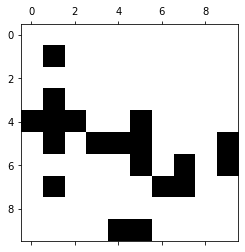

In [14]:
initialize_helper_matrix(maze_size)
agent3(maze_size)
# [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]

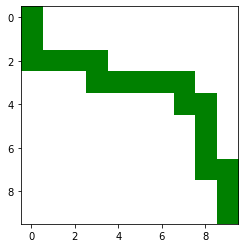

In [15]:
path_matrix = np.full((maze_size, maze_size), 0)
for i in confirmed_path:
    path_matrix[i] = 1
colormap = colors.ListedColormap(["white","black","green"])
plt.imshow(path_matrix, cmap=colormap)
plt.show()

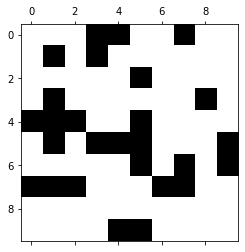

In [16]:
block_unblock_matrix
plt.spy(block_unblock_matrix)

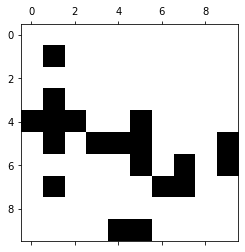

In [17]:
agent_gridworld
plt.spy(agent_gridworld)

In [18]:
number_of_bumps

19

# Code for Agent 4 (our agent) goes here

In [19]:
def agent4(): # using this name for the lack of a better name. please change.
    source = (0,0,0)
    _,_,_,path = astar(source,agent_gridworld)
    goal_reached = False
    
    
    while not goal_reached:
        for node in path:
            if full_gridworld[node] == 0:
                #do something
                break
            else:
                #do something
                break
    return